<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/Gradient_Boosting_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]
R2 sq: 0.9800347273281851
Mean squared error: 5.85
Test Variance score: 0.91


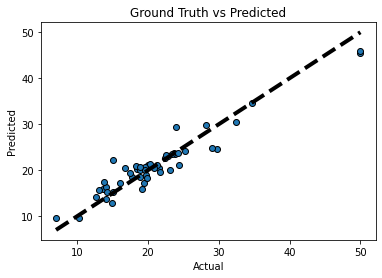

In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_predict

boston=datasets.load_boston()
print(boston.data.shape,boston.target.shape)
print(boston.feature_names)

data=pd.DataFrame(boston.data,columns=boston.feature_names)
data=pd.concat([data,pd.Series(boston.target,name='MEDV')],axis=1)
print(data.head())

X=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_training_set,x_test_set,y_training_set,y_test_set=train_test_split(X,y,test_size=0.10,random_state=42,shuffle=True)
params={'n_estimators':500,'max_depth':4,'min_samples_split':2,'learning_rate':0.01,'loss':'ls'}
model=ensemble.GradientBoostingRegressor(**params)
model.fit(x_training_set,y_training_set)
model_score=model.score(x_training_set,y_training_set)
print('R2 sq:',model_score)

y_predicted=model.predict(x_test_set)
print("Mean squared error: %.2f"% mean_squared_error(y_test_set,y_predicted))
print('Test Variance score: %.2f'%r2_score(y_test_set,y_predicted))

fig,ax=plt.subplots()
ax.scatter(y_test_set,y_predicted,edgecolors=(0,0,0))
ax.plot([y_test_set.min(),y_test_set.max()],[y_test_set.min(),y_test_set.max()],'k--',lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()